In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 1.4.0  Device: cpu


In [2]:
batch_size = 32

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

In [3]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


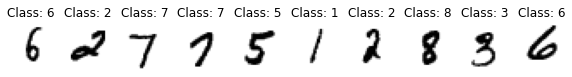

In [4]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray_r")
    plt.title('Class: '+str(y_train[i].item()))

In [5]:
class Net(nn.Module):
    def __init__(self, Net):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4*4, 8)
        self.fc1_drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(8, 8)
        self.fc2_drop = nn.Dropout(0.25)
        self.fc3 = nn.Linear(8, 10)

    def forward(self, x):
        x = x.view(-1, 4*4)
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        return F.log_softmax(self.fc3(x), dim=1)

model = Net(Net).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()



print(model)

model.fc1.weight

model.fc1.weight.size()

Net(
  (fc1): Linear(in_features=16, out_features=8, bias=True)
  (fc1_drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc2_drop): Dropout(p=0.25, inplace=False)
  (fc3): Linear(in_features=8, out_features=10, bias=True)
)


torch.Size([8, 16])

In [6]:
import networkx as nx
G2 = nx.DiGraph()

In [7]:
#Create nodes of graph
for layer_index in range(1,6):
    layer = None
    if(layer_index == 1): layer = model.fc1
    if(layer_index == 2): layer = model.fc2
    if(layer_index == 3): layer = model.fc3
    #if(layer_index == 4): layer = model.fc4
    #if(layer_index == 5): layer = model.fc5
    for neuron_index in range(0,layer.weight.size()[1]):
        print("n"+str(layer_index)+"_"+str(neuron_index))
        G.add_node("n"+str(layer_index)+"_"+str(neuron_index))
    
    print("Layer "+str(layer_index)+" done")
    
for neuron_index in range(0,model.fc5.weight.size()[0]):
        print("out_"+str(neuron_index))
        G.add_node("out_"+str(neuron_index))
    
print("Output layer done")

n1_0


NameError: name 'G' is not defined

In [ ]:
#Create edges of graph
#G.add_edge(1, 2)
#G.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5)])
for layer_index in range(1,5):
    layer = None
    if(layer_index == 1): layer = model.fc1
    if(layer_index == 2): layer = model.fc2
    #if(layer_index == 3): layer = model.fc3
    #if(layer_index == 4): layer = model.fc4
    #if(layer_index == 5): layer = model.fc5
        
    for x in range(0,layer.weight.size()[0]):
        for y in range(0,layer.weight.size()[1]):
            inNode = "n"+str(layer_index)+"_"+str(y)
            outNode = "n"+str(layer_index+1)+"_"+str(x)
            G.add_weighted_edges_from([(inNode, outNode, layer.weight[x][y].item())])
            print("Added edge from "+inNode+" to "+outNode+" with weight "+str(layer.weight[x][y].item()))
    print("Layer "+str(layer_index)+" edges done")
    
for x in range(0,model.fc3.weight.size()[0]):
        for y in range(0,model.fc5.weight.size()[1]):
            inNode = "n3_"+str(y)
            outNode = "out_"+str(x)
            G.add_weighted_edges_from([(inNode, outNode, layer.weight[x][y].item())])
            print("Added edge from "+inNode+" to "+outNode+" with weight "+str(layer.weight[x][y].item()))
print("Output layer edges done")

In [ ]:
#nx.write_gexf(G, "mlp123untrained.gexf")

In [ ]:
model.fc3.weight.size()

In [221]:
model.fc1.weight

Parameter containing:
tensor([[-0.0769, -0.1920, -0.1708, -0.1052, -0.0451,  0.0208, -0.1547,  0.0137,
          0.0470, -0.0155,  0.2155, -0.1377, -0.1658, -0.0791,  0.1138, -0.1287],
        [-0.0697,  0.0713, -0.0109,  0.1012, -0.1294,  0.0877, -0.1135, -0.2083,
         -0.2143,  0.0350, -0.1873, -0.1048,  0.2234, -0.2422,  0.0319, -0.1862],
        [-0.1347,  0.0648, -0.2279, -0.1522,  0.1098,  0.1515, -0.0300, -0.1517,
         -0.0330,  0.1589,  0.2124,  0.0122,  0.0359, -0.1003,  0.1242,  0.0344],
        [-0.0894, -0.1178,  0.0691,  0.2273, -0.0614, -0.0380, -0.1783,  0.0878,
          0.0960,  0.1523,  0.1926, -0.2298, -0.1381, -0.0762,  0.2330,  0.1536],
        [ 0.0680,  0.2486, -0.0568,  0.0223,  0.0591,  0.2050,  0.1539, -0.0253,
          0.2473,  0.1358,  0.1071, -0.1966,  0.2049,  0.1237,  0.2354,  0.2438],
        [-0.2196, -0.1676,  0.2257,  0.2342, -0.0589, -0.0703,  0.0493,  0.0027,
         -0.1126,  0.1165, -0.1109,  0.2356,  0.1650, -0.1409,  0.0247, -0.1183],


In [222]:
model.fc2.weight

Parameter containing:
tensor([[ 0.0499, -0.1910, -0.2392,  0.1924,  0.3064,  0.3038, -0.0762, -0.3462],
        [-0.1155,  0.2616, -0.1224, -0.0951,  0.0407, -0.2199, -0.2090,  0.2246],
        [-0.2996, -0.1299,  0.3493, -0.0597,  0.0306,  0.2367, -0.1322,  0.1993],
        [-0.2079,  0.1560, -0.0281,  0.3347,  0.0953,  0.0462,  0.2613, -0.1511],
        [ 0.2937,  0.0144,  0.0715, -0.1619, -0.1103,  0.2952,  0.1026,  0.0634],
        [ 0.1602, -0.2926, -0.1264, -0.0940, -0.1333,  0.2447,  0.3208, -0.3245],
        [-0.2317,  0.2740,  0.2552,  0.1431, -0.1691,  0.0918,  0.0681,  0.3349],
        [ 0.0251, -0.2464,  0.0202, -0.0451, -0.2558, -0.0922,  0.0560,  0.2823]],
       requires_grad=True)

In [223]:
model.fc1.weight.size()

torch.Size([8, 16])

In [224]:
model.fc2.weight.size()

torch.Size([8, 8])

In [225]:
model.fc3.weight.size()

torch.Size([10, 8])

In [8]:
def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()
    
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass data through the network
        output = model(data)

        # Calculate loss
        loss = criterion(output, target)

        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

In [9]:
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

In [10]:
%%time
epochs = 10

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

ValueError: Expected input batch_size (1568) to match target batch_size (32).

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

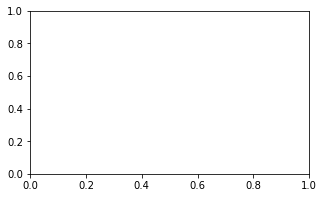

In [229]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

In [133]:
#class Net(nn.Module):
#    def __init__(self, Net):


#        for layer in Net.named_modules():
#            print(layer)

In [135]:
model.fc3.weight[0]

tensor([ 0.5048, -0.3861,  0.8042,  0.0952, -0.3145,  0.9930, -0.6659,  0.5189],
       grad_fn=<SelectBackward>)

In [136]:

model.fc1.weight.size()

torch.Size([8, 784])

In [137]:
model.fc2.weight



Parameter containing:
tensor([[ 1.1690e+00, -1.4242e-01,  7.9791e-01,  6.0133e-01, -1.2794e-03,
          7.1260e-01, -1.7864e-03, -2.7091e-02],
        [-2.1705e-01, -1.4926e-01, -3.5042e-01, -5.2991e-01,  2.9962e-01,
         -2.2413e-01,  9.0810e-02,  1.5153e+00],
        [ 8.0238e-01, -1.7170e-01, -4.2463e-01,  7.4180e-01,  1.4968e+00,
         -5.2342e-02, -4.7558e-01,  2.9712e-01],
        [-2.7560e-01,  1.4237e-01,  1.1800e+00,  2.0193e-01, -1.3645e-01,
         -2.9053e-01,  1.0485e+00, -3.1988e-02],
        [-1.0331e+00,  2.0492e-01, -5.4954e-02,  8.6006e-02,  2.7779e-01,
         -1.2176e+00,  7.4421e-01,  2.4797e-01],
        [-1.6225e-01, -6.5652e-01, -4.9016e-01,  3.1607e-01,  1.0042e+00,
         -3.8348e-01, -8.0528e-01,  5.4522e-03],
        [ 1.9273e-01,  6.8630e-01, -7.0017e-01, -3.1007e-01, -6.8090e-01,
          3.1099e-01, -3.0915e-01,  1.3575e+00],
        [-2.7990e-02,  1.0309e+00, -1.2379e-01,  1.2666e+00,  1.5424e-01,
          1.6341e-02,  1.1729e+00, -1.3428e

In [138]:
model.fc3.weight


Parameter containing:
tensor([[ 0.5048, -0.3861,  0.8042,  0.0952, -0.3145,  0.9930, -0.6659,  0.5189],
        [-1.1015, -0.8476, -1.1555, -0.7889, -0.0100,  0.5394, -1.4160, -1.5674],
        [ 0.5444, -0.2786, -0.1138,  0.7127, -0.5635, -0.3295, -0.2774, -0.1142],
        [ 0.5285,  0.4283,  0.5309, -0.1614, -0.8075, -0.2773,  0.4819, -0.7867],
        [-0.8632,  0.4608, -0.9235,  0.6279,  0.6852, -0.3366,  0.4720,  0.5522],
        [ 0.4908,  0.0800,  0.5970, -0.0893, -0.5166,  0.0724,  0.3835,  0.5411],
        [ 0.3774, -1.0958,  0.2841,  0.7694,  0.6104, -0.1640, -0.8157,  0.5889],
        [-0.5705,  0.5634,  0.6066, -0.2443,  0.5377,  1.0340,  0.3764, -0.0950],
        [ 0.2291, -0.3165, -0.4832, -0.4007, -0.7070, -0.5794,  0.3211,  0.3203],
        [-0.5564,  0.5543,  0.1526, -0.4804,  0.4726,  0.0505,  0.5114,  0.3590]],
       requires_grad=True)

In [140]:
print(model.fc1.weight.size())
print(model.fc2.weight.size())
print(model.fc3.weight.size())
#print(model.fc4.weight.size())
#print(model.fc5.weight.size())

torch.Size([8, 784])
torch.Size([8, 8])
torch.Size([10, 8])


In [141]:
import networkx as nx
G = nx.DiGraph()

In [142]:
#Create nodes of graph
for layer_index in range(1,6):
    layer = None
    if(layer_index == 1): layer = model.fc1
    if(layer_index == 2): layer = model.fc2
    if(layer_index == 3): layer = model.fc3
    #if(layer_index == 4): layer = model.fc4
    #if(layer_index == 5): layer = model.fc5
    for neuron_index in range(0,layer.weight.size()[1]):
        print("n"+str(layer_index)+"_"+str(neuron_index))
        G.add_node("n"+str(layer_index)+"_"+str(neuron_index))
    
    print("Layer "+str(layer_index)+" done")
    
for neuron_index in range(0,model.fc5.weight.size()[0]):
        print("out_"+str(neuron_index))
        G.add_node("out_"+str(neuron_index))
    
print("Output layer done")

n1_0
n1_1
n1_2
n1_3
n1_4
n1_5
n1_6
n1_7
n1_8
n1_9
n1_10
n1_11
n1_12
n1_13
n1_14
n1_15
n1_16
n1_17
n1_18
n1_19
n1_20
n1_21
n1_22
n1_23
n1_24
n1_25
n1_26
n1_27
n1_28
n1_29
n1_30
n1_31
n1_32
n1_33
n1_34
n1_35
n1_36
n1_37
n1_38
n1_39
n1_40
n1_41
n1_42
n1_43
n1_44
n1_45
n1_46
n1_47
n1_48
n1_49
n1_50
n1_51
n1_52
n1_53
n1_54
n1_55
n1_56
n1_57
n1_58
n1_59
n1_60
n1_61
n1_62
n1_63
n1_64
n1_65
n1_66
n1_67
n1_68
n1_69
n1_70
n1_71
n1_72
n1_73
n1_74
n1_75
n1_76
n1_77
n1_78
n1_79
n1_80
n1_81
n1_82
n1_83
n1_84
n1_85
n1_86
n1_87
n1_88
n1_89
n1_90
n1_91
n1_92
n1_93
n1_94
n1_95
n1_96
n1_97
n1_98
n1_99
n1_100
n1_101
n1_102
n1_103
n1_104
n1_105
n1_106
n1_107
n1_108
n1_109
n1_110
n1_111
n1_112
n1_113
n1_114
n1_115
n1_116
n1_117
n1_118
n1_119
n1_120
n1_121
n1_122
n1_123
n1_124
n1_125
n1_126
n1_127
n1_128
n1_129
n1_130
n1_131
n1_132
n1_133
n1_134
n1_135
n1_136
n1_137
n1_138
n1_139
n1_140
n1_141
n1_142
n1_143
n1_144
n1_145
n1_146
n1_147
n1_148
n1_149
n1_150
n1_151
n1_152
n1_153
n1_154
n1_155
n1_156
n1_157
n1_1

AttributeError: 'NoneType' object has no attribute 'weight'

In [146]:
# 50 rows with 784 columns
# each value is the edge weight from input neuron y to output neuron x
print(model.fc1.weight.size())
print(model.fc1.weight.size()[0])
print(model.fc1.weight.size()[1])
print(model.fc1.weight[0].size())
print(model.fc1.weight[0][0])

torch.Size([8, 784])
8
784
torch.Size([784])
tensor(-0.0096, grad_fn=<SelectBackward>)


In [147]:
#Create edges of graph
#G.add_edge(1, 2)
#G.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5)])
for layer_index in range(1,5):
    layer = None
    if(layer_index == 1): layer = model.fc1
    if(layer_index == 2): layer = model.fc2
    #if(layer_index == 3): layer = model.fc3
    #if(layer_index == 4): layer = model.fc4
    #if(layer_index == 5): layer = model.fc5
        
    for x in range(0,layer.weight.size()[0]):
        for y in range(0,layer.weight.size()[1]):
            inNode = "n"+str(layer_index)+"_"+str(y)
            outNode = "n"+str(layer_index+1)+"_"+str(x)
            G.add_weighted_edges_from([(inNode, outNode, layer.weight[x][y].item())])
            print("Added edge from "+inNode+" to "+outNode+" with weight "+str(layer.weight[x][y].item()))
    print("Layer "+str(layer_index)+" edges done")
    
for x in range(0,model.fc3.weight.size()[0]):
        for y in range(0,model.fc5.weight.size()[1]):
            inNode = "n3_"+str(y)
            outNode = "out_"+str(x)
            G.add_weighted_edges_from([(inNode, outNode, layer.weight[x][y].item())])
            print("Added edge from "+inNode+" to "+outNode+" with weight "+str(layer.weight[x][y].item()))
print("Output layer edges done")

Added edge from n1_0 to n2_0 with weight -0.00962877832353115
Added edge from n1_1 to n2_0 with weight -0.019749803468585014
Added edge from n1_2 to n2_0 with weight -0.0062441155314445496
Added edge from n1_3 to n2_0 with weight -0.029724573716521263
Added edge from n1_4 to n2_0 with weight 0.024161238223314285
Added edge from n1_5 to n2_0 with weight -0.008603880181908607
Added edge from n1_6 to n2_0 with weight 0.023135095834732056
Added edge from n1_7 to n2_0 with weight -0.027584370225667953
Added edge from n1_8 to n2_0 with weight -0.02869444712996483
Added edge from n1_9 to n2_0 with weight -0.014090776443481445
Added edge from n1_10 to n2_0 with weight 0.012739334255456924
Added edge from n1_11 to n2_0 with weight -0.017865709960460663
Added edge from n1_12 to n2_0 with weight -0.02666820026934147
Added edge from n1_13 to n2_0 with weight -0.02578868716955185
Added edge from n1_14 to n2_0 with weight -0.018635179847478867
Added edge from n1_15 to n2_0 with weight -0.01691361144

Added edge from n1_205 to n2_0 with weight -0.008029752410948277
Added edge from n1_206 to n2_0 with weight -0.03642086684703827
Added edge from n1_207 to n2_0 with weight 0.053656067699193954
Added edge from n1_208 to n2_0 with weight 0.007668840698897839
Added edge from n1_209 to n2_0 with weight 0.04075458273291588
Added edge from n1_210 to n2_0 with weight 0.03513677418231964
Added edge from n1_211 to n2_0 with weight -0.015896053984761238
Added edge from n1_212 to n2_0 with weight 0.023581238463521004
Added edge from n1_213 to n2_0 with weight 0.04321102797985077
Added edge from n1_214 to n2_0 with weight 0.050354212522506714
Added edge from n1_215 to n2_0 with weight 0.0470249243080616
Added edge from n1_216 to n2_0 with weight 0.010599103756248951
Added edge from n1_217 to n2_0 with weight 0.050274595618247986
Added edge from n1_218 to n2_0 with weight 0.06087464839220047
Added edge from n1_219 to n2_0 with weight 0.10250487178564072
Added edge from n1_220 to n2_0 with weight 0.

Added edge from n1_507 to n2_0 with weight 0.055843908339738846
Added edge from n1_508 to n2_0 with weight 0.1131666824221611
Added edge from n1_509 to n2_0 with weight 0.10453303903341293
Added edge from n1_510 to n2_0 with weight 0.13716354966163635
Added edge from n1_511 to n2_0 with weight 0.06211355701088905
Added edge from n1_512 to n2_0 with weight -0.038864295929670334
Added edge from n1_513 to n2_0 with weight -0.182200625538826
Added edge from n1_514 to n2_0 with weight -0.2444501370191574
Added edge from n1_515 to n2_0 with weight -0.2635723948478699
Added edge from n1_516 to n2_0 with weight -0.21914559602737427
Added edge from n1_517 to n2_0 with weight -0.20650911331176758
Added edge from n1_518 to n2_0 with weight -0.21644064784049988
Added edge from n1_519 to n2_0 with weight -0.07369217276573181
Added edge from n1_520 to n2_0 with weight 0.08242552727460861
Added edge from n1_521 to n2_0 with weight 0.07543543726205826
Added edge from n1_522 to n2_0 with weight 0.04604

Added edge from n1_701 to n2_0 with weight -0.029467562213540077
Added edge from n1_702 to n2_0 with weight 0.0046997517347335815
Added edge from n1_703 to n2_0 with weight 0.01074378751218319
Added edge from n1_704 to n2_0 with weight 0.02646387368440628
Added edge from n1_705 to n2_0 with weight -0.025420021265745163
Added edge from n1_706 to n2_0 with weight -0.06532256305217743
Added edge from n1_707 to n2_0 with weight -0.08041603118181229
Added edge from n1_708 to n2_0 with weight -0.10315541177988052
Added edge from n1_709 to n2_0 with weight -0.08664675801992416
Added edge from n1_710 to n2_0 with weight -0.004058495629578829
Added edge from n1_711 to n2_0 with weight 0.016893088817596436
Added edge from n1_712 to n2_0 with weight -0.038280971348285675
Added edge from n1_713 to n2_0 with weight 0.0003676864434964955
Added edge from n1_714 to n2_0 with weight -0.048628319054841995
Added edge from n1_715 to n2_0 with weight -0.010364932008087635
Added edge from n1_716 to n2_0 wit

Added edge from n1_107 to n2_1 with weight -0.027850860729813576
Added edge from n1_108 to n2_1 with weight -0.02162020467221737
Added edge from n1_109 to n2_1 with weight -0.03459423780441284
Added edge from n1_110 to n2_1 with weight -0.02392474189400673
Added edge from n1_111 to n2_1 with weight -0.0034720823168754578
Added edge from n1_112 to n2_1 with weight -0.022723935544490814
Added edge from n1_113 to n2_1 with weight -0.014428360387682915
Added edge from n1_114 to n2_1 with weight 0.0009167929529212415
Added edge from n1_115 to n2_1 with weight -0.022652994841337204
Added edge from n1_116 to n2_1 with weight 0.03679594397544861
Added edge from n1_117 to n2_1 with weight -0.025442596524953842
Added edge from n1_118 to n2_1 with weight -0.045146193355321884
Added edge from n1_119 to n2_1 with weight -0.010970907285809517
Added edge from n1_120 to n2_1 with weight -0.06687473505735397
Added edge from n1_121 to n2_1 with weight -0.11470349133014679
Added edge from n1_122 to n2_1 

Added edge from n1_311 to n2_1 with weight -0.09431514889001846
Added edge from n1_312 to n2_1 with weight -0.11179938167333603
Added edge from n1_313 to n2_1 with weight 0.033141206949949265
Added edge from n1_314 to n2_1 with weight 0.05182443931698799
Added edge from n1_315 to n2_1 with weight 0.10748811066150665
Added edge from n1_316 to n2_1 with weight 0.10900034010410309
Added edge from n1_317 to n2_1 with weight 0.12453370541334152
Added edge from n1_318 to n2_1 with weight 0.16676804423332214
Added edge from n1_319 to n2_1 with weight 0.23966118693351746
Added edge from n1_320 to n2_1 with weight 0.2770874500274658
Added edge from n1_321 to n2_1 with weight -0.1297769546508789
Added edge from n1_322 to n2_1 with weight -0.23922978341579437
Added edge from n1_323 to n2_1 with weight -0.1391844004392624
Added edge from n1_324 to n2_1 with weight -0.05023713782429695
Added edge from n1_325 to n2_1 with weight -0.1045275628566742
Added edge from n1_326 to n2_1 with weight -0.08836

Added edge from n1_488 to n2_1 with weight 0.042554885149002075
Added edge from n1_489 to n2_1 with weight 0.051094017922878265
Added edge from n1_490 to n2_1 with weight 0.005396637134253979
Added edge from n1_491 to n2_1 with weight 0.05962653458118439
Added edge from n1_492 to n2_1 with weight 0.06687715649604797
Added edge from n1_493 to n2_1 with weight 0.011270811781287193
Added edge from n1_494 to n2_1 with weight 0.019169963896274567
Added edge from n1_495 to n2_1 with weight -0.023471949622035027
Added edge from n1_496 to n2_1 with weight -0.019768519327044487
Added edge from n1_497 to n2_1 with weight -0.02261960692703724
Added edge from n1_498 to n2_1 with weight -0.09215404093265533
Added edge from n1_499 to n2_1 with weight -0.06382191181182861
Added edge from n1_500 to n2_1 with weight -0.10950803756713867
Added edge from n1_501 to n2_1 with weight -0.06528251618146896
Added edge from n1_502 to n2_1 with weight -0.010967734269797802
Added edge from n1_503 to n2_1 with wei

Added edge from n1_655 to n2_1 with weight 0.03365185856819153
Added edge from n1_656 to n2_1 with weight 0.0399862565100193
Added edge from n1_657 to n2_1 with weight 0.056002262979745865
Added edge from n1_658 to n2_1 with weight 0.04523394629359245
Added edge from n1_659 to n2_1 with weight 0.04289141297340393
Added edge from n1_660 to n2_1 with weight 0.0737205296754837
Added edge from n1_661 to n2_1 with weight 0.01602904498577118
Added edge from n1_662 to n2_1 with weight 0.03044148162007332
Added edge from n1_663 to n2_1 with weight 0.05039273202419281
Added edge from n1_664 to n2_1 with weight 0.09328044205904007
Added edge from n1_665 to n2_1 with weight 0.08842722326517105
Added edge from n1_666 to n2_1 with weight 0.06437262892723083
Added edge from n1_667 to n2_1 with weight 0.03762681409716606
Added edge from n1_668 to n2_1 with weight -0.005878610536456108
Added edge from n1_669 to n2_1 with weight 0.008477005176246166
Added edge from n1_670 to n2_1 with weight 0.02962025

Added edge from n1_56 to n2_2 with weight 0.009184606373310089
Added edge from n1_57 to n2_2 with weight 0.01795448735356331
Added edge from n1_58 to n2_2 with weight 0.03492141142487526
Added edge from n1_59 to n2_2 with weight 0.024022525176405907
Added edge from n1_60 to n2_2 with weight -0.011698387563228607
Added edge from n1_61 to n2_2 with weight -0.01774982549250126
Added edge from n1_62 to n2_2 with weight -0.03020448051393032
Added edge from n1_63 to n2_2 with weight -0.005763187538832426
Added edge from n1_64 to n2_2 with weight 0.0340581014752388
Added edge from n1_65 to n2_2 with weight 0.020993944257497787
Added edge from n1_66 to n2_2 with weight 0.03552757203578949
Added edge from n1_67 to n2_2 with weight 0.09875740855932236
Added edge from n1_68 to n2_2 with weight 0.10735417157411575
Added edge from n1_69 to n2_2 with weight 0.03718212619423866
Added edge from n1_70 to n2_2 with weight 0.04326920583844185
Added edge from n1_71 to n2_2 with weight 0.000477419263916090

Added edge from n1_230 to n2_2 with weight -0.026379749178886414
Added edge from n1_231 to n2_2 with weight -0.024543773382902145
Added edge from n1_232 to n2_2 with weight -0.009504335932433605
Added edge from n1_233 to n2_2 with weight -0.01810685731470585
Added edge from n1_234 to n2_2 with weight 0.04132720082998276
Added edge from n1_235 to n2_2 with weight 0.028514042496681213
Added edge from n1_236 to n2_2 with weight 0.006843408569693565
Added edge from n1_237 to n2_2 with weight 0.021667087450623512
Added edge from n1_238 to n2_2 with weight 0.0007520992658101022
Added edge from n1_239 to n2_2 with weight -0.026099856942892075
Added edge from n1_240 to n2_2 with weight -0.055065613240003586
Added edge from n1_241 to n2_2 with weight -0.08946910500526428
Added edge from n1_242 to n2_2 with weight -0.21512684226036072
Added edge from n1_243 to n2_2 with weight -0.0945931151509285
Added edge from n1_244 to n2_2 with weight -0.08111077547073364
Added edge from n1_245 to n2_2 with 

Added edge from n1_378 to n2_2 with weight -0.06206819415092468
Added edge from n1_379 to n2_2 with weight -0.0441167838871479
Added edge from n1_380 to n2_2 with weight -0.018237944692373276
Added edge from n1_381 to n2_2 with weight -0.03436001390218735
Added edge from n1_382 to n2_2 with weight -0.03940625488758087
Added edge from n1_383 to n2_2 with weight -0.004463294055312872
Added edge from n1_384 to n2_2 with weight -0.024502838030457497
Added edge from n1_385 to n2_2 with weight 0.014741694554686546
Added edge from n1_386 to n2_2 with weight 0.026104101911187172
Added edge from n1_387 to n2_2 with weight 0.08496879786252975
Added edge from n1_388 to n2_2 with weight 0.11367679387331009
Added edge from n1_389 to n2_2 with weight 0.04278107360005379
Added edge from n1_390 to n2_2 with weight 0.035931870341300964
Added edge from n1_391 to n2_2 with weight -0.005576350260525942
Added edge from n1_392 to n2_2 with weight 0.016317037865519524
Added edge from n1_393 to n2_2 with weig

Added edge from n1_544 to n2_2 with weight 0.16471119225025177
Added edge from n1_545 to n2_2 with weight 0.08500751107931137
Added edge from n1_546 to n2_2 with weight 0.1301053762435913
Added edge from n1_547 to n2_2 with weight 0.1377180814743042
Added edge from n1_548 to n2_2 with weight 0.013348722830414772
Added edge from n1_549 to n2_2 with weight 0.10973058640956879
Added edge from n1_550 to n2_2 with weight 0.10003525763750076
Added edge from n1_551 to n2_2 with weight 0.03738047555088997
Added edge from n1_552 to n2_2 with weight 0.0719800591468811
Added edge from n1_553 to n2_2 with weight 0.08717900514602661
Added edge from n1_554 to n2_2 with weight 0.07252980023622513
Added edge from n1_555 to n2_2 with weight 0.1518593579530716
Added edge from n1_556 to n2_2 with weight 0.10590679943561554
Added edge from n1_557 to n2_2 with weight 0.12146550416946411
Added edge from n1_558 to n2_2 with weight 0.025887154042720795
Added edge from n1_559 to n2_2 with weight 0.002965311752

Added edge from n1_732 to n2_2 with weight 0.015559043735265732
Added edge from n1_733 to n2_2 with weight 0.010684543289244175
Added edge from n1_734 to n2_2 with weight -0.012693524360656738
Added edge from n1_735 to n2_2 with weight 0.02488447166979313
Added edge from n1_736 to n2_2 with weight -0.0032889433205127716
Added edge from n1_737 to n2_2 with weight -0.03405740484595299
Added edge from n1_738 to n2_2 with weight -0.027360696345567703
Added edge from n1_739 to n2_2 with weight -0.012437527067959309
Added edge from n1_740 to n2_2 with weight 0.0016855247085914016
Added edge from n1_741 to n2_2 with weight -0.03941156715154648
Added edge from n1_742 to n2_2 with weight -0.008171272464096546
Added edge from n1_743 to n2_2 with weight -0.02529866434633732
Added edge from n1_744 to n2_2 with weight 0.007334398105740547
Added edge from n1_745 to n2_2 with weight -0.010900875553488731
Added edge from n1_746 to n2_2 with weight -0.000316984107485041
Added edge from n1_747 to n2_2 w

Added edge from n1_136 to n2_3 with weight 0.010902849026024342
Added edge from n1_137 to n2_3 with weight -0.0026204336900264025
Added edge from n1_138 to n2_3 with weight -0.012194717302918434
Added edge from n1_139 to n2_3 with weight -0.012475271709263325
Added edge from n1_140 to n2_3 with weight 0.02411872148513794
Added edge from n1_141 to n2_3 with weight -0.004238847643136978
Added edge from n1_142 to n2_3 with weight -0.02116451784968376
Added edge from n1_143 to n2_3 with weight -0.010936316102743149
Added edge from n1_144 to n2_3 with weight -0.0776740312576294
Added edge from n1_145 to n2_3 with weight -0.08183450996875763
Added edge from n1_146 to n2_3 with weight -0.11270839720964432
Added edge from n1_147 to n2_3 with weight -0.1885206550359726
Added edge from n1_148 to n2_3 with weight -0.20108389854431152
Added edge from n1_149 to n2_3 with weight -0.12864485383033752
Added edge from n1_150 to n2_3 with weight 0.0029258383437991142
Added edge from n1_151 to n2_3 with 

Added edge from n1_318 to n2_3 with weight 0.1170235350728035
Added edge from n1_319 to n2_3 with weight 0.08808963000774384
Added edge from n1_320 to n2_3 with weight 0.13467849791049957
Added edge from n1_321 to n2_3 with weight 0.03705556318163872
Added edge from n1_322 to n2_3 with weight -0.15373948216438293
Added edge from n1_323 to n2_3 with weight -0.36670345067977905
Added edge from n1_324 to n2_3 with weight -0.2172635793685913
Added edge from n1_325 to n2_3 with weight -0.19250842928886414
Added edge from n1_326 to n2_3 with weight -0.20570215582847595
Added edge from n1_327 to n2_3 with weight -0.16770513355731964
Added edge from n1_328 to n2_3 with weight -0.12960484623908997
Added edge from n1_329 to n2_3 with weight -0.09435062855482101
Added edge from n1_330 to n2_3 with weight -0.16376373171806335
Added edge from n1_331 to n2_3 with weight -0.04414130747318268
Added edge from n1_332 to n2_3 with weight -0.1238313540816307
Added edge from n1_333 to n2_3 with weight -0.0

Added edge from n1_490 to n2_3 with weight -0.16234368085861206
Added edge from n1_491 to n2_3 with weight -0.22718355059623718
Added edge from n1_492 to n2_3 with weight -0.13196057081222534
Added edge from n1_493 to n2_3 with weight 0.04528006538748741
Added edge from n1_494 to n2_3 with weight 0.03316951170563698
Added edge from n1_495 to n2_3 with weight 0.06373627483844757
Added edge from n1_496 to n2_3 with weight 0.07451185584068298
Added edge from n1_497 to n2_3 with weight 0.0522933304309845
Added edge from n1_498 to n2_3 with weight 0.04254923015832901
Added edge from n1_499 to n2_3 with weight -0.026244336739182472
Added edge from n1_500 to n2_3 with weight -0.08235957473516464
Added edge from n1_501 to n2_3 with weight -0.09693310409784317
Added edge from n1_502 to n2_3 with weight -0.014496706426143646
Added edge from n1_503 to n2_3 with weight -0.028947466984391212
Added edge from n1_504 to n2_3 with weight -0.01946898363530636
Added edge from n1_505 to n2_3 with weight -

Added edge from n1_624 to n2_3 with weight 0.10221301019191742
Added edge from n1_625 to n2_3 with weight 0.05569151043891907
Added edge from n1_626 to n2_3 with weight 0.055843476206064224
Added edge from n1_627 to n2_3 with weight 0.030952800065279007
Added edge from n1_628 to n2_3 with weight 0.03767123818397522
Added edge from n1_629 to n2_3 with weight 0.03932523727416992
Added edge from n1_630 to n2_3 with weight -0.045677125453948975
Added edge from n1_631 to n2_3 with weight 0.07066281884908676
Added edge from n1_632 to n2_3 with weight 0.07251858711242676
Added edge from n1_633 to n2_3 with weight 0.021772297099232674
Added edge from n1_634 to n2_3 with weight 0.02318740077316761
Added edge from n1_635 to n2_3 with weight 0.0005865333951078355
Added edge from n1_636 to n2_3 with weight -0.056722354143857956
Added edge from n1_637 to n2_3 with weight -0.049460168927907944
Added edge from n1_638 to n2_3 with weight -0.030011652037501335
Added edge from n1_639 to n2_3 with weight

Added edge from n1_110 to n2_4 with weight 0.02999022975564003
Added edge from n1_111 to n2_4 with weight -0.030165866017341614
Added edge from n1_112 to n2_4 with weight -0.014204686507582664
Added edge from n1_113 to n2_4 with weight 0.0074392929673194885
Added edge from n1_114 to n2_4 with weight -0.0035539232194423676
Added edge from n1_115 to n2_4 with weight 0.0041627162136137486
Added edge from n1_116 to n2_4 with weight -0.030657071620225906
Added edge from n1_117 to n2_4 with weight -0.037863221019506454
Added edge from n1_118 to n2_4 with weight -0.028084317222237587
Added edge from n1_119 to n2_4 with weight -0.029012149199843407
Added edge from n1_120 to n2_4 with weight -0.05237778648734093
Added edge from n1_121 to n2_4 with weight -0.032183803617954254
Added edge from n1_122 to n2_4 with weight -0.013943464495241642
Added edge from n1_123 to n2_4 with weight -0.001664547249674797
Added edge from n1_124 to n2_4 with weight 0.0060375286266207695
Added edge from n1_125 to n

Added edge from n1_252 to n2_4 with weight 0.011186004616320133
Added edge from n1_253 to n2_4 with weight 0.009833846241235733
Added edge from n1_254 to n2_4 with weight 0.07452301681041718
Added edge from n1_255 to n2_4 with weight 0.14327497780323029
Added edge from n1_256 to n2_4 with weight 0.11205213516950607
Added edge from n1_257 to n2_4 with weight 0.18070603907108307
Added edge from n1_258 to n2_4 with weight 0.1363939642906189
Added edge from n1_259 to n2_4 with weight 0.11476334929466248
Added edge from n1_260 to n2_4 with weight 0.025400741025805473
Added edge from n1_261 to n2_4 with weight 0.09308652579784393
Added edge from n1_262 to n2_4 with weight 0.07921487092971802
Added edge from n1_263 to n2_4 with weight 0.04164242744445801
Added edge from n1_264 to n2_4 with weight 0.03312692046165466
Added edge from n1_265 to n2_4 with weight 0.12905429303646088
Added edge from n1_266 to n2_4 with weight 0.15228168666362762
Added edge from n1_267 to n2_4 with weight 0.09106287

Added edge from n1_441 to n2_4 with weight 0.063474640250206
Added edge from n1_442 to n2_4 with weight 0.05849748104810715
Added edge from n1_443 to n2_4 with weight 0.10777419805526733
Added edge from n1_444 to n2_4 with weight 0.04236075282096863
Added edge from n1_445 to n2_4 with weight -0.0009800289990380406
Added edge from n1_446 to n2_4 with weight 0.01919080689549446
Added edge from n1_447 to n2_4 with weight 0.012606441974639893
Added edge from n1_448 to n2_4 with weight 0.032584838569164276
Added edge from n1_449 to n2_4 with weight 0.033677052706480026
Added edge from n1_450 to n2_4 with weight 0.020473074167966843
Added edge from n1_451 to n2_4 with weight -0.04587629437446594
Added edge from n1_452 to n2_4 with weight -0.013034189119935036
Added edge from n1_453 to n2_4 with weight 0.0005060497205704451
Added edge from n1_454 to n2_4 with weight 0.01072822418063879
Added edge from n1_455 to n2_4 with weight 0.11706545203924179
Added edge from n1_456 to n2_4 with weight 0.

Added edge from n1_619 to n2_4 with weight -0.025419732555747032
Added edge from n1_620 to n2_4 with weight -0.13259828090667725
Added edge from n1_621 to n2_4 with weight -0.08966749161481857
Added edge from n1_622 to n2_4 with weight -0.07541877776384354
Added edge from n1_623 to n2_4 with weight -0.06810348480939865
Added edge from n1_624 to n2_4 with weight 0.014839986339211464
Added edge from n1_625 to n2_4 with weight 0.07216636091470718
Added edge from n1_626 to n2_4 with weight 0.045433077961206436
Added edge from n1_627 to n2_4 with weight 0.010172630660235882
Added edge from n1_628 to n2_4 with weight 0.06771855801343918
Added edge from n1_629 to n2_4 with weight 0.11442134529352188
Added edge from n1_630 to n2_4 with weight 0.10008741915225983
Added edge from n1_631 to n2_4 with weight 0.012451552785933018
Added edge from n1_632 to n2_4 with weight -0.034430306404829025
Added edge from n1_633 to n2_4 with weight -0.09583660960197449
Added edge from n1_634 to n2_4 with weight

Added edge from n1_755 to n2_4 with weight -0.030282380059361458
Added edge from n1_756 to n2_4 with weight 0.030577432364225388
Added edge from n1_757 to n2_4 with weight 0.01881423220038414
Added edge from n1_758 to n2_4 with weight 0.019290711730718613
Added edge from n1_759 to n2_4 with weight 0.0316939614713192
Added edge from n1_760 to n2_4 with weight 0.01814194768667221
Added edge from n1_761 to n2_4 with weight -0.0068451049737632275
Added edge from n1_762 to n2_4 with weight 0.034666676074266434
Added edge from n1_763 to n2_4 with weight 0.0005915804649703205
Added edge from n1_764 to n2_4 with weight 0.02066941000521183
Added edge from n1_765 to n2_4 with weight -0.007992065511643887
Added edge from n1_766 to n2_4 with weight 0.015632400289177895
Added edge from n1_767 to n2_4 with weight -0.012663428671658039
Added edge from n1_768 to n2_4 with weight 0.033299870789051056
Added edge from n1_769 to n2_4 with weight 0.062352344393730164
Added edge from n1_770 to n2_4 with wei

Added edge from n1_144 to n2_5 with weight 0.030028102919459343
Added edge from n1_145 to n2_5 with weight 0.01982470601797104
Added edge from n1_146 to n2_5 with weight 0.0990837961435318
Added edge from n1_147 to n2_5 with weight 0.14899607002735138
Added edge from n1_148 to n2_5 with weight 0.11568638682365417
Added edge from n1_149 to n2_5 with weight 0.07466863095760345
Added edge from n1_150 to n2_5 with weight 0.06435122340917587
Added edge from n1_151 to n2_5 with weight 0.11854222416877747
Added edge from n1_152 to n2_5 with weight 0.07018651813268661
Added edge from n1_153 to n2_5 with weight 0.0402865931391716
Added edge from n1_154 to n2_5 with weight 0.07997731864452362
Added edge from n1_155 to n2_5 with weight -5.9088109992444515e-05
Added edge from n1_156 to n2_5 with weight 0.10884303599596024
Added edge from n1_157 to n2_5 with weight 0.09407567977905273
Added edge from n1_158 to n2_5 with weight 0.029460899531841278
Added edge from n1_159 to n2_5 with weight 0.043612

Added edge from n1_292 to n2_5 with weight -0.04191360995173454
Added edge from n1_293 to n2_5 with weight -0.05648355558514595
Added edge from n1_294 to n2_5 with weight -0.08911247551441193
Added edge from n1_295 to n2_5 with weight -0.1161905974149704
Added edge from n1_296 to n2_5 with weight 0.001671015052124858
Added edge from n1_297 to n2_5 with weight -0.0023547434248030186
Added edge from n1_298 to n2_5 with weight -0.051448240876197815
Added edge from n1_299 to n2_5 with weight -0.04740327224135399
Added edge from n1_300 to n2_5 with weight -0.009113737381994724
Added edge from n1_301 to n2_5 with weight -0.00767066003754735
Added edge from n1_302 to n2_5 with weight 0.034227944910526276
Added edge from n1_303 to n2_5 with weight 0.15305601060390472
Added edge from n1_304 to n2_5 with weight 0.2917082905769348
Added edge from n1_305 to n2_5 with weight 0.20193690061569214
Added edge from n1_306 to n2_5 with weight 0.09125923365354538
Added edge from n1_307 to n2_5 with weight

Added edge from n1_546 to n2_5 with weight -0.04304712265729904
Added edge from n1_547 to n2_5 with weight 0.048512641340494156
Added edge from n1_548 to n2_5 with weight 0.07582616806030273
Added edge from n1_549 to n2_5 with weight 0.12175197154283524
Added edge from n1_550 to n2_5 with weight 0.11216014623641968
Added edge from n1_551 to n2_5 with weight 0.08321322500705719
Added edge from n1_552 to n2_5 with weight 0.07872571796178818
Added edge from n1_553 to n2_5 with weight 0.10299751907587051
Added edge from n1_554 to n2_5 with weight 0.17495565116405487
Added edge from n1_555 to n2_5 with weight 0.11534043401479721
Added edge from n1_556 to n2_5 with weight 0.061467841267585754
Added edge from n1_557 to n2_5 with weight 0.05866101756691933
Added edge from n1_558 to n2_5 with weight 0.006134366150945425
Added edge from n1_559 to n2_5 with weight -0.010528996586799622
Added edge from n1_560 to n2_5 with weight 0.0005981586873531342
Added edge from n1_561 to n2_5 with weight 0.00

Added edge from n1_681 to n2_5 with weight 0.0793335810303688
Added edge from n1_682 to n2_5 with weight 0.031430404633283615
Added edge from n1_683 to n2_5 with weight 0.08191439509391785
Added edge from n1_684 to n2_5 with weight 0.1423424482345581
Added edge from n1_685 to n2_5 with weight 0.08234038949012756
Added edge from n1_686 to n2_5 with weight 0.102326899766922
Added edge from n1_687 to n2_5 with weight 0.14355191588401794
Added edge from n1_688 to n2_5 with weight 0.17353932559490204
Added edge from n1_689 to n2_5 with weight 0.08167651295661926
Added edge from n1_690 to n2_5 with weight 0.0603272020816803
Added edge from n1_691 to n2_5 with weight 0.040329787880182266
Added edge from n1_692 to n2_5 with weight 0.017041156068444252
Added edge from n1_693 to n2_5 with weight 0.007981020957231522
Added edge from n1_694 to n2_5 with weight 0.039362940937280655
Added edge from n1_695 to n2_5 with weight 0.0031523327343165874
Added edge from n1_696 to n2_5 with weight 0.03422312

Added edge from n1_150 to n2_6 with weight -0.057912830263376236
Added edge from n1_151 to n2_6 with weight -0.12991492450237274
Added edge from n1_152 to n2_6 with weight -0.05989612266421318
Added edge from n1_153 to n2_6 with weight -0.1798488348722458
Added edge from n1_154 to n2_6 with weight -0.09109443426132202
Added edge from n1_155 to n2_6 with weight -0.05783446878194809
Added edge from n1_156 to n2_6 with weight -0.011998595669865608
Added edge from n1_157 to n2_6 with weight 0.012830632738769054
Added edge from n1_158 to n2_6 with weight 0.042680930346250534
Added edge from n1_159 to n2_6 with weight 0.03460700437426567
Added edge from n1_160 to n2_6 with weight 0.04721745476126671
Added edge from n1_161 to n2_6 with weight 0.05370059609413147
Added edge from n1_162 to n2_6 with weight 0.06550153344869614
Added edge from n1_163 to n2_6 with weight 0.10928567498922348
Added edge from n1_164 to n2_6 with weight -0.020062780007719994
Added edge from n1_165 to n2_6 with weight 

Added edge from n1_291 to n2_6 with weight -0.07752958685159683
Added edge from n1_292 to n2_6 with weight -0.06634144484996796
Added edge from n1_293 to n2_6 with weight -0.03567655757069588
Added edge from n1_294 to n2_6 with weight -0.19208374619483948
Added edge from n1_295 to n2_6 with weight -0.2077687680721283
Added edge from n1_296 to n2_6 with weight -0.15688206255435944
Added edge from n1_297 to n2_6 with weight -0.06204184517264366
Added edge from n1_298 to n2_6 with weight -0.09392095357179642
Added edge from n1_299 to n2_6 with weight -0.06814827769994736
Added edge from n1_300 to n2_6 with weight -0.12321417778730392
Added edge from n1_301 to n2_6 with weight -0.13830265402793884
Added edge from n1_302 to n2_6 with weight -0.10259934514760971
Added edge from n1_303 to n2_6 with weight -0.1925397366285324
Added edge from n1_304 to n2_6 with weight -0.19315847754478455
Added edge from n1_305 to n2_6 with weight -0.15693399310112
Added edge from n1_306 to n2_6 with weight -0

Added edge from n1_474 to n2_6 with weight -0.05760110542178154
Added edge from n1_475 to n2_6 with weight -0.04628702625632286
Added edge from n1_476 to n2_6 with weight 0.003817319869995117
Added edge from n1_477 to n2_6 with weight 0.03204038366675377
Added edge from n1_478 to n2_6 with weight -0.007127977441996336
Added edge from n1_479 to n2_6 with weight -0.07294648140668869
Added edge from n1_480 to n2_6 with weight -0.12461579591035843
Added edge from n1_481 to n2_6 with weight -0.13230262696743011
Added edge from n1_482 to n2_6 with weight -0.04754916951060295
Added edge from n1_483 to n2_6 with weight 0.07774696499109268
Added edge from n1_484 to n2_6 with weight 0.08968324214220047
Added edge from n1_485 to n2_6 with weight 0.06433508545160294
Added edge from n1_486 to n2_6 with weight 0.12565065920352936
Added edge from n1_487 to n2_6 with weight 0.11843288689851761
Added edge from n1_488 to n2_6 with weight 0.007735134568065405
Added edge from n1_489 to n2_6 with weight 0.

Added edge from n1_644 to n2_6 with weight -0.0012469328939914703
Added edge from n1_645 to n2_6 with weight -0.016049755737185478
Added edge from n1_646 to n2_6 with weight 0.03321263939142227
Added edge from n1_647 to n2_6 with weight 0.03174910694360733
Added edge from n1_648 to n2_6 with weight -0.027378588914871216
Added edge from n1_649 to n2_6 with weight -0.017467400059103966
Added edge from n1_650 to n2_6 with weight -0.031209805980324745
Added edge from n1_651 to n2_6 with weight -0.07105251401662827
Added edge from n1_652 to n2_6 with weight -0.10101237893104553
Added edge from n1_653 to n2_6 with weight -0.10151208937168121
Added edge from n1_654 to n2_6 with weight -0.16286835074424744
Added edge from n1_655 to n2_6 with weight -0.18527920544147491
Added edge from n1_656 to n2_6 with weight -0.24352245032787323
Added edge from n1_657 to n2_6 with weight -0.21682392060756683
Added edge from n1_658 to n2_6 with weight -0.15146885812282562
Added edge from n1_659 to n2_6 with 

Added edge from n1_13 to n2_7 with weight 0.000565654831007123
Added edge from n1_14 to n2_7 with weight 0.021532591432332993
Added edge from n1_15 to n2_7 with weight -0.023888137191534042
Added edge from n1_16 to n2_7 with weight 0.027091126888990402
Added edge from n1_17 to n2_7 with weight -0.014605330303311348
Added edge from n1_18 to n2_7 with weight -0.008648637682199478
Added edge from n1_19 to n2_7 with weight -0.0003348030149936676
Added edge from n1_20 to n2_7 with weight 0.004478868097066879
Added edge from n1_21 to n2_7 with weight 0.02175719663500786
Added edge from n1_22 to n2_7 with weight 0.02098744362592697
Added edge from n1_23 to n2_7 with weight 0.01607450097799301
Added edge from n1_24 to n2_7 with weight 0.007506605237722397
Added edge from n1_25 to n2_7 with weight -0.03471040353178978
Added edge from n1_26 to n2_7 with weight 0.0008231736719608307
Added edge from n1_27 to n2_7 with weight 0.003202911466360092
Added edge from n1_28 to n2_7 with weight 0.01879225

Added edge from n1_221 to n2_7 with weight 0.026660431176424026
Added edge from n1_222 to n2_7 with weight 0.001121644163504243
Added edge from n1_223 to n2_7 with weight -0.008200268261134624
Added edge from n1_224 to n2_7 with weight -0.001399808912537992
Added edge from n1_225 to n2_7 with weight -0.005640901625156403
Added edge from n1_226 to n2_7 with weight 0.009895991533994675
Added edge from n1_227 to n2_7 with weight 0.05000057443976402
Added edge from n1_228 to n2_7 with weight 0.07959460467100143
Added edge from n1_229 to n2_7 with weight 0.05739077180624008
Added edge from n1_230 to n2_7 with weight 0.054110024124383926
Added edge from n1_231 to n2_7 with weight 0.054266318678855896
Added edge from n1_232 to n2_7 with weight 0.006873039528727531
Added edge from n1_233 to n2_7 with weight 0.0527714267373085
Added edge from n1_234 to n2_7 with weight 0.03417043760418892
Added edge from n1_235 to n2_7 with weight 0.049016885459423065
Added edge from n1_236 to n2_7 with weight 

Added edge from n1_357 to n2_7 with weight 0.024740740656852722
Added edge from n1_358 to n2_7 with weight -0.011809071525931358
Added edge from n1_359 to n2_7 with weight -0.0759502574801445
Added edge from n1_360 to n2_7 with weight -0.045441772788763046
Added edge from n1_361 to n2_7 with weight -0.040454596281051636
Added edge from n1_362 to n2_7 with weight -0.014724326319992542
Added edge from n1_363 to n2_7 with weight -0.032592471688985825
Added edge from n1_364 to n2_7 with weight -0.01463080383837223
Added edge from n1_365 to n2_7 with weight 0.03555769473314285
Added edge from n1_366 to n2_7 with weight 0.03973781690001488
Added edge from n1_367 to n2_7 with weight 0.02697630226612091
Added edge from n1_368 to n2_7 with weight 0.11696179956197739
Added edge from n1_369 to n2_7 with weight 0.12986817955970764
Added edge from n1_370 to n2_7 with weight 0.050489507615566254
Added edge from n1_371 to n2_7 with weight 0.07945016771554947
Added edge from n1_372 to n2_7 with weight

Added edge from n1_518 to n2_7 with weight -0.10844793170690536
Added edge from n1_519 to n2_7 with weight -0.10138639062643051
Added edge from n1_520 to n2_7 with weight -0.05953652784228325
Added edge from n1_521 to n2_7 with weight -0.01882147789001465
Added edge from n1_522 to n2_7 with weight -0.06121786683797836
Added edge from n1_523 to n2_7 with weight -0.05974604934453964
Added edge from n1_524 to n2_7 with weight 0.02260754257440567
Added edge from n1_525 to n2_7 with weight -0.03498446196317673
Added edge from n1_526 to n2_7 with weight -0.1573864370584488
Added edge from n1_527 to n2_7 with weight -0.18659166991710663
Added edge from n1_528 to n2_7 with weight -0.11333147436380386
Added edge from n1_529 to n2_7 with weight -0.04857834428548813
Added edge from n1_530 to n2_7 with weight 0.004102102480828762
Added edge from n1_531 to n2_7 with weight -0.0003614821471273899
Added edge from n1_532 to n2_7 with weight -0.025046195834875107
Added edge from n1_533 to n2_7 with wei

Added edge from n1_662 to n2_7 with weight -0.16019973158836365
Added edge from n1_663 to n2_7 with weight -0.19003063440322876
Added edge from n1_664 to n2_7 with weight -0.16397665441036224
Added edge from n1_665 to n2_7 with weight -0.0935223400592804
Added edge from n1_666 to n2_7 with weight -0.07943100482225418
Added edge from n1_667 to n2_7 with weight -0.01197931356728077
Added edge from n1_668 to n2_7 with weight -0.024567974731326103
Added edge from n1_669 to n2_7 with weight 0.017329027876257896
Added edge from n1_670 to n2_7 with weight -0.000334788637701422
Added edge from n1_671 to n2_7 with weight 0.03221801295876503
Added edge from n1_672 to n2_7 with weight 0.01136215403676033
Added edge from n1_673 to n2_7 with weight -0.028482165187597275
Added edge from n1_674 to n2_7 with weight -0.005266548600047827
Added edge from n1_675 to n2_7 with weight 0.0017991240601986647
Added edge from n1_676 to n2_7 with weight 0.09143974632024765
Added edge from n1_677 to n2_7 with wei

Added edge from n2_4 to n3_1 with weight 0.2996196150779724
Added edge from n2_5 to n3_1 with weight -0.2241305261850357
Added edge from n2_6 to n3_1 with weight 0.09080951660871506
Added edge from n2_7 to n3_1 with weight 1.5153361558914185
Added edge from n2_0 to n3_2 with weight 0.8023806214332581
Added edge from n2_1 to n3_2 with weight -0.17169712483882904
Added edge from n2_2 to n3_2 with weight -0.42463451623916626
Added edge from n2_3 to n3_2 with weight 0.7417958378791809
Added edge from n2_4 to n3_2 with weight 1.4967749118804932
Added edge from n2_5 to n3_2 with weight -0.052341561764478683
Added edge from n2_6 to n3_2 with weight -0.4755818843841553
Added edge from n2_7 to n3_2 with weight 0.29712364077568054
Added edge from n2_0 to n3_3 with weight -0.2755967974662781
Added edge from n2_1 to n3_3 with weight 0.14237231016159058
Added edge from n2_2 to n3_3 with weight 1.1799595355987549
Added edge from n2_3 to n3_3 with weight 0.20193389058113098
Added edge from n2_4 to n3

AttributeError: 'NoneType' object has no attribute 'weight'

In [151]:
#Export graph to gephi
#nx.write_gexf(G, "mlp1.gexf")

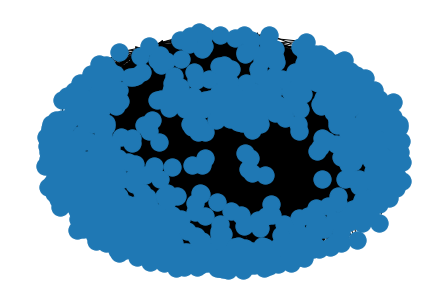

In [148]:
nx.draw(G)

In [ ]:
nx.draw_planar(G)

In [149]:
nx.draw_spectral(G)

ArpackNoConvergence: ARPACK error -1: No convergence (8001 iterations, 0/3 eigenvectors converged)

In [150]:
nx.draw_spring(G)

Error in callback <function flush_figures at 0x00000275AF775DC0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
nx.draw_shell(G)